In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Part 4 ~ Houses price
Multy variables linear regression

Text(0, 0.5, 'house price in 1000s')

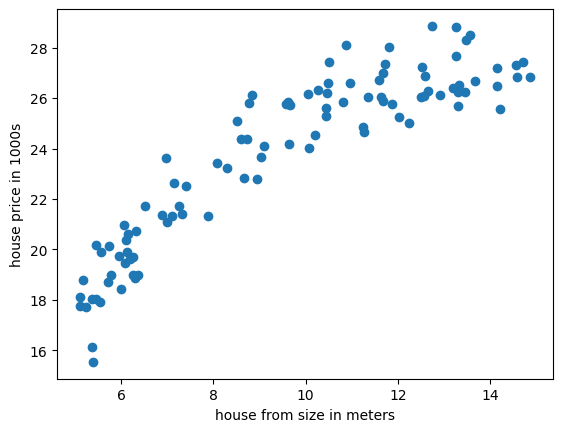

In [2]:
x = np.load('data\\TA_Xhouses.npy')
y = np.load('data\\TA_yprice.npy')

plt.scatter(x, y)
plt.xlabel('house from size in meters')
plt.ylabel('house price in 1000s')



In [3]:
h = lambda theta, X: np.dot(X, theta)
cost_computation = lambda theta, X, y: (1 / (2 * y.size)) * np.sum((h(theta, X) - y) ** 2)



def mini_batch_gd(theta, X, y, alpha, num_iters, batch_size):
    m = y.shape[0]  # number of training examples
    cost_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        idx = np.random.randint(0, m, batch_size)
        X_batch = X[idx]
        y_batch = y[idx]
        
        predictions = h(theta, X_batch)
        errors = predictions - y_batch
        gradient = (1 / batch_size) * np.dot(X_batch.T, errors)
        theta -= alpha * gradient
        cost_history[i] = cost_computation(theta, X, y)
        
        if i % 100 == 0:  # print the cost every 100 iterations
            print(f"Iteration {i}: Cost {cost_history[i]}")
    
    return theta, cost_history

Iteration 0: Cost 9.668838400039785
Iteration 100: Cost 8.350371284324458
Iteration 200: Cost 7.071318566631288
Iteration 300: Cost 6.082337629480759
Iteration 400: Cost 5.592887824313184
Iteration 500: Cost 4.506849855318743
Iteration 600: Cost 4.51949301731686
Iteration 700: Cost 3.5813654621412656
Iteration 800: Cost 3.3195323671178447
Iteration 900: Cost 2.7387873549049386


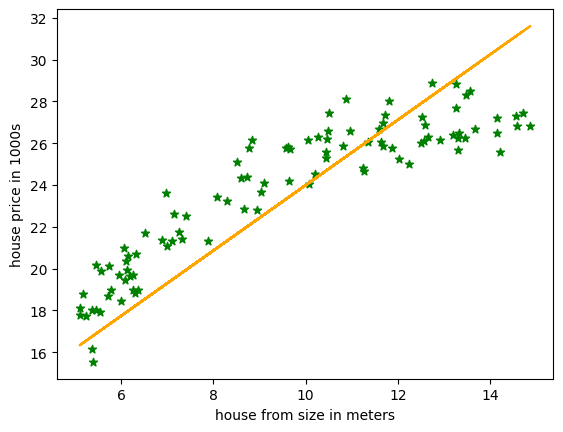

In [7]:
theta_mb = np.zeros((2,1))
X = np.c_[np.ones(x.shape[0]), x]
alpha = 0.01
iterations = 1000
batch_size = 10

theta_mb, cost_history = mini_batch_gd(theta_mb, X, y, alpha, iterations, batch_size)


plt.scatter(x, y, color='green', marker='*')
plt.plot(x, h(theta_mb, X), color='orange')
plt.xlabel('house from size in meters')
plt.ylabel('house price in 1000s')

def make_prediction(size, theta) -> float:
    return theta[0] + theta[1] * size

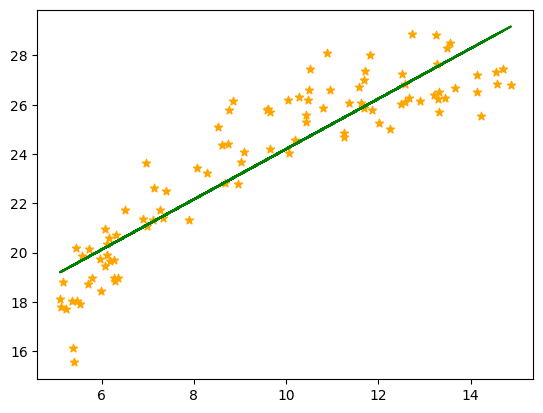

In [6]:
model = LinearRegression()
model.fit(x, y)
plt.scatter(x, y, color='orange', marker='*')
plt.plot(x, model.predict(x), color='green')

In [8]:
print(f'prediction for 15 meters  house : {make_prediction(15, theta_mb)[0]:.3f}K dollars')
print(f'prediction for 27 meters: {make_prediction(27, theta_mb)[0]:.3f}K dollars')

print(f'using sklearn prediction for 15 meters house: {model.predict([[15]])[0][0]:.3f}K dollars')
print(f'using sklearn prediction for 27 meters house: {model.predict([[27]])[0][0]:.3f}K dollars')

prediction for 15 meters  house : 31.813K dollars
prediction for 27 meters: 50.576K dollars
using sklearn prediction for 15 meters house: 29.304K dollars
using sklearn prediction for 27 meters house: 41.554K dollars


Iteration 0: Cost 34.20570737382239
Iteration 100: Cost 24.898644170088783
Iteration 200: Cost 22.30430722679097
Iteration 300: Cost 21.579830567685782
Iteration 400: Cost 17.822205342050065
Iteration 500: Cost 16.065344053790625
Iteration 600: Cost 16.65702043090993
Iteration 700: Cost 15.79823867109148
Iteration 800: Cost 11.89813889742711
Iteration 900: Cost 18.333395636520933
Iteration 1000: Cost 11.81495711792625
Iteration 1100: Cost 10.116019075651968
Iteration 1200: Cost 9.408882176438384
Iteration 1300: Cost 7.451987929503168
Iteration 1400: Cost 7.5448272726345476
Iteration 1500: Cost 5.841472652644852
Iteration 1600: Cost 6.068457630380598
Iteration 1700: Cost 4.841201347240047
Iteration 1800: Cost 6.039202024914164
Iteration 1900: Cost 4.884696445001886
Iteration 2000: Cost 4.122999195370419
Iteration 2100: Cost 3.5066284676319412
Iteration 2200: Cost 3.141910857970892
Iteration 2300: Cost 3.2925742033891403
Iteration 2400: Cost 3.8485811776979495
Iteration 2500: Cost 2.5836

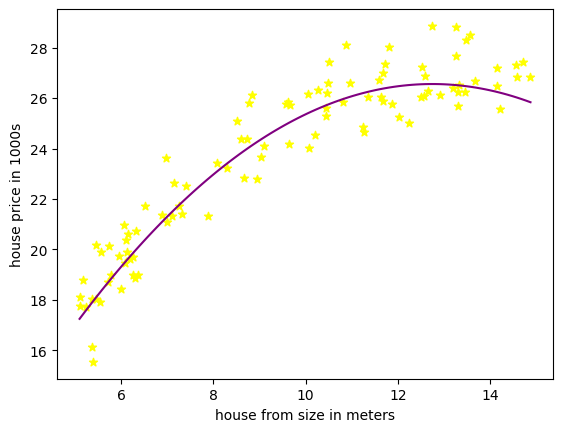

In [10]:
# add polynomial features to the model by adding x^2
alpha = 0.0001
iterations = 10000
X_poly = np.c_[np.ones(x.shape[0]), x, x**2]
theta_mb_poly = np.zeros((3,1))

coef = np.polyfit(y.flatten(), y.flatten(), 2)
coef = coef.reshape(-1, 1)
theta_mb_poly = coef
theta_mb_poly, cost_history = mini_batch_gd(theta_mb_poly, X_poly, y, alpha, iterations, batch_size)

plt.scatter(x, y, color='yellow', marker='*')

y_pred = h(theta_mb_poly, X_poly)
x_plot = np.linspace(min(x), max(x), 100)
y_pred_plot = h(theta_mb_poly, np.c_[np.ones(x_plot.shape[0]), x_plot, x_plot**2])

plt.plot(x_plot, y_pred_plot, color='purple')
plt.xlabel('house from size in meters')
plt.ylabel('house price in 1000s')


def make_prediction_poly(size, theta) -> float:
    return theta[0] + theta[1] * size + theta[2] * size**2



print(f'prediction for 15 meters house: {make_prediction_poly(15, theta_mb_poly)[0]:.3f}K dollars')
print(f'prediction for 27 meters house: {make_prediction_poly(27, theta_mb_poly)[0]:.3f}K dollars')


In [11]:
theta_mb_poly

array([[ 0.68817519],
       [ 4.05985712],
       [-0.15927853]])